# Time Series Forecasting with LSTM

## <font color='#4073FF'>Project Solution: Time Series Forecasting Google(Stocks)</font>

###  <font color='#14AAF5'>The objective of this project is to forecast the closing price for google stocks. </font>

### Project Brief:

Stock market data can be interesting to analyze and as a further incentive, strong predictive models can have large financial payoff. The amount of financial data on the web is seemingly endless. A large and well structured dataset on a wide array of companies can be hard to come by. Here you are provided a dataset with historical stock prices (2012 - 2018) for google. You are required to split data into train and test sets and make predictions on test set.

###  Dataset

The dataset consists of the following columns:

- Date - in format: yy-mm-dd
- Open - price of the stock at market open (this is NYSE data so all in USD)
- High - Highest price reached in the day
- Low Close - Lowest price reached in the day
- Volume - Number of shares traded
- Name - the stock's ticker name

In [1]:
# Importing the libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

import pandas as pd

C:\Users\snehal\anaconda3\anaconda3.1\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


###  Data collection and exploration

In [2]:
#Loading the data
df = pd.read_csv('GOOGL_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])

# Viewing the data
df.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL


In [3]:
df.tail()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2017-12-22,1070.00,1071.72,1067.64,1068.86,889446,GOOGL
2017-12-26,1068.64,1068.86,1058.64,1065.85,918767,GOOGL
2017-12-27,1066.60,1068.27,1058.38,1060.20,1116203,GOOGL
2017-12-28,1062.25,1064.84,1053.38,1055.95,994249,GOOGL
2017-12-29,1055.49,1058.05,1052.70,1053.40,1180340,GOOGL


In [4]:
# Looking for missing values
df.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

<AxesSubplot:xlabel='Date'>

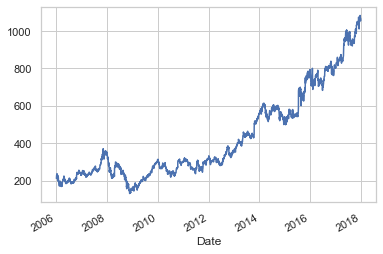

In [5]:
df["Open"].plot()

In [6]:
df

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL
...,...,...,...,...,...,...
2017-12-22,1070.00,1071.72,1067.64,1068.86,889446,GOOGL
2017-12-26,1068.64,1068.86,1058.64,1065.85,918767,GOOGL
2017-12-27,1066.60,1068.27,1058.38,1060.20,1116203,GOOGL


In [7]:
df_2017 = df[(df.index > '2017-01-01') & (df.index <= '2017-12-31')]

In [8]:
df_2017

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2017-01-03,800.62,811.44,796.89,808.01,1959033,GOOGL
2017-01-04,809.89,813.43,804.11,807.77,1515339,GOOGL
2017-01-05,807.50,813.74,805.92,813.02,1340535,GOOGL
2017-01-06,814.99,828.96,811.50,825.21,2017097,GOOGL
2017-01-09,826.37,830.43,821.62,827.18,1408924,GOOGL
...,...,...,...,...,...,...
2017-12-22,1070.00,1071.72,1067.64,1068.86,889446,GOOGL
2017-12-26,1068.64,1068.86,1058.64,1065.85,918767,GOOGL
2017-12-27,1066.60,1068.27,1058.38,1060.20,1116203,GOOGL


In [9]:
df_2017["Open"]

Date
2017-01-03     800.62
2017-01-04     809.89
2017-01-05     807.50
2017-01-06     814.99
2017-01-09     826.37
               ...   
2017-12-22    1070.00
2017-12-26    1068.64
2017-12-27    1066.60
2017-12-28    1062.25
2017-12-29    1055.49
Name: Open, Length: 251, dtype: float64

In [10]:
df_2016 = df[(df.index > '2016-01-01') & (df.index <= '2016-12-31')]

<AxesSubplot:xlabel='Date'>

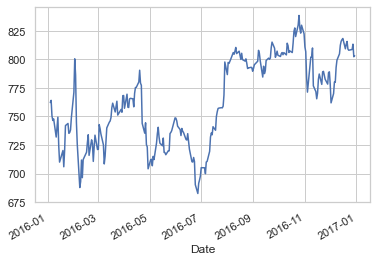

In [11]:
df_2016["Open"].plot()

<AxesSubplot:xlabel='Date'>

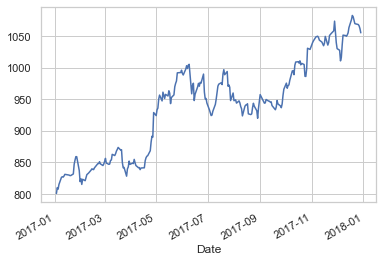

In [12]:
df_2017["Open"].plot()

###  Data visualization

#### Google stock attributes

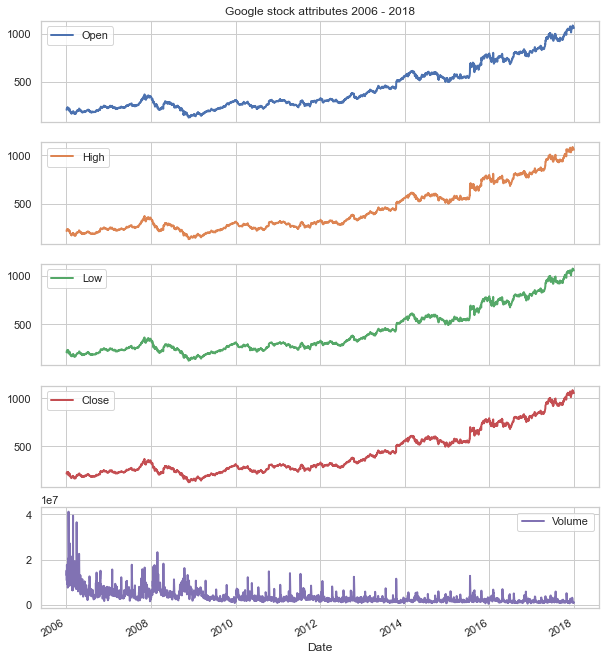

In [13]:
ax = df['2006':'2018'].plot(subplots=True,figsize = (10,12), linewidth = 2)
ax[0].set_title("Google stock attributes 2006 - 2018")
plt.show()

#### Rolling window

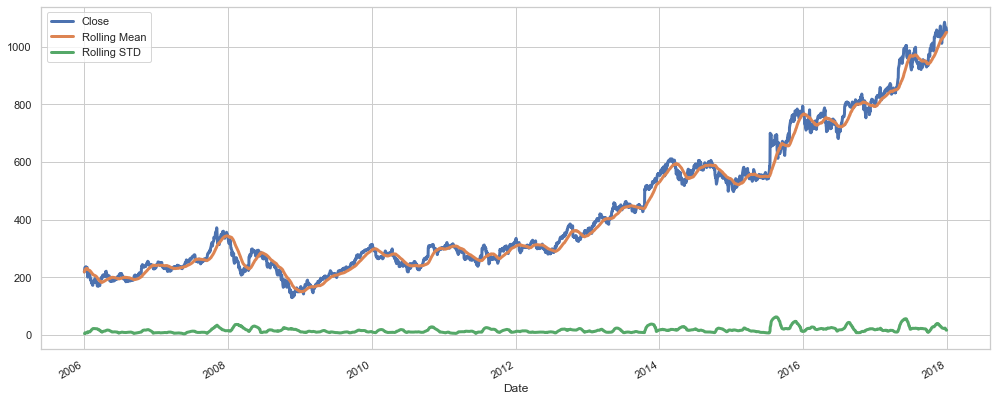

In [14]:
# Rolling window functions

# Plotting a rolling mean of 60 day window with original Closed attribute of google stocks

rollingm = df.Close.rolling('60D').mean()
rollings = df.Close.rolling('60D').std()

plt.figure(figsize = (17,7))
df.Close.plot(linewidth = 3)
rollingm.plot(linewidth = 3)
rollings.plot(linewidth = 3)

plt.legend(['Close','Rolling Mean','Rolling STD'])
plt.show()

#### Calculating Returns

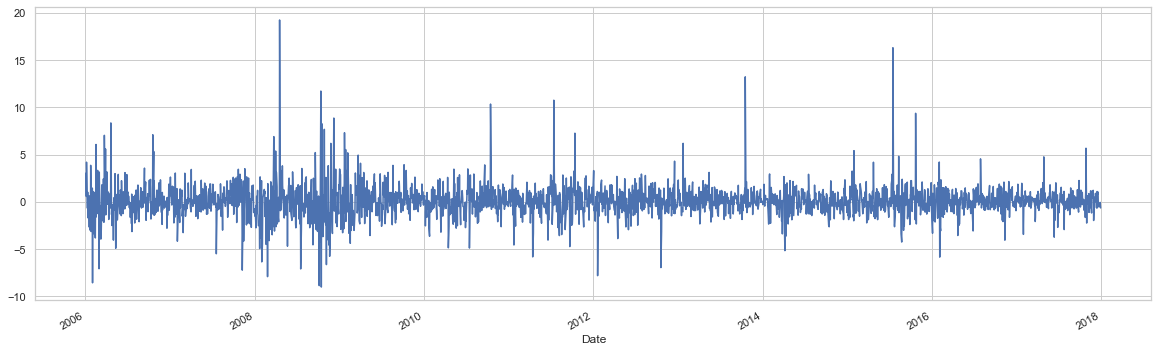

In [15]:
# Returns(at high)
df['Returns'] = df.High.pct_change().mul(100)
df['Returns'].plot(figsize=(20,6))
plt.show()

#### Year wise boxplot - High

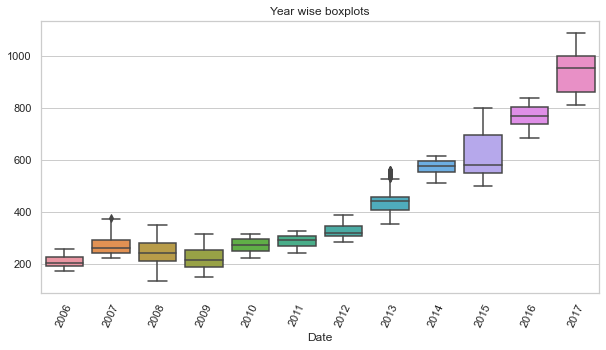

In [16]:
plt.figure(figsize = (10,5))
sns.boxplot(x = df.index.year,y = df.High.values)
plt.title("Year wise boxplots")
plt.xticks(rotation = 65)
plt.show()

#### Lagplots

A lag plot checks whether a data set or time series is random or not.
Random data should not exhibit any identifiable structure in the lag plot.
Non-random structure in the lag plot indicates that the underlying data is not random


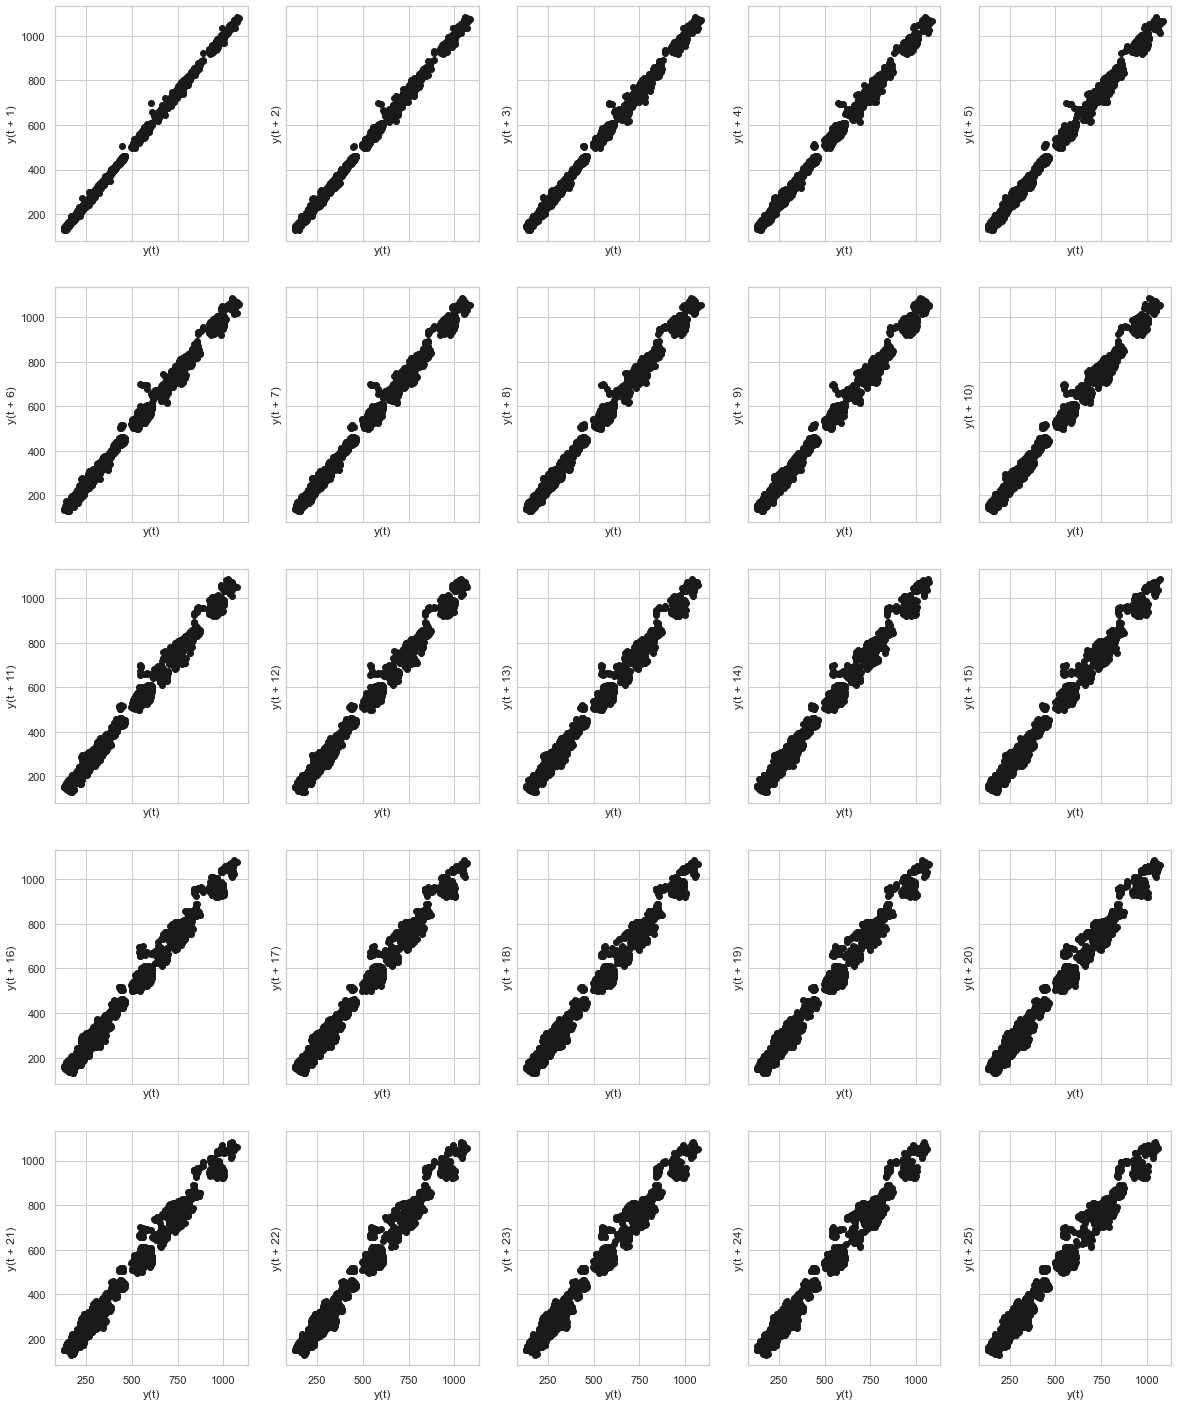

In [17]:
from pandas.plotting import lag_plot
fig, ax = plt.subplots(5,5, sharex=True, sharey=True, figsize = (20,25))

row,col = 0,0
for i in range(25):
  
  lag_plot(df['Close'],lag = i+1, ax = ax[row,col], c = 'k')
  col+=1

  if col == 5:
      col = 0
      row += 1

As the lag plot gives a linear plot, it means the autocorrelation is present in the data. There is positive autocorrelation. As more data is concentrated on the diagonal in lag plot, it means there is a strong autocorrelation.

#### Autocorrelation Plot

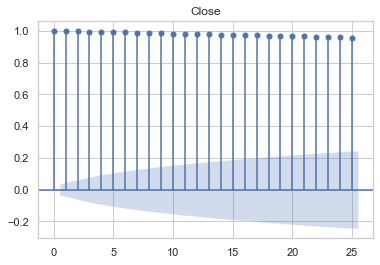

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df["Close"],lags=25,title="Close")
plt.show()

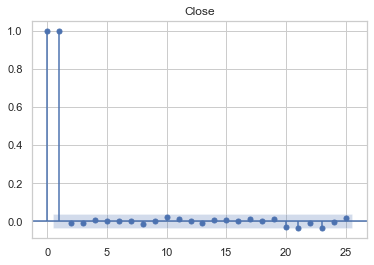

In [19]:
plot_pacf(df["Close"],lags=25,title="Close")
plt.show()

# Time series forcasting with fbprophet

In [20]:
#Loading the data
df = pd.read_csv('GOOGL_2006-01-01_to_2018-01-01.csv', parse_dates=['Date'])

# Viewing the data
df.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
1,2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2,2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
3,2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
4,2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL


### Data Preperation 

In [21]:
from datetime import date
import holidays
  
# Select country
us_holidays = holidays.USA()
us_holidays
holidays_list =[]
# Print all the holidays in UnitedKingdom in year 2018
for ptr in holidays.USA(years = (2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017)).items():
    holidays_list.append(ptr)

In [22]:
ds=[]
holiday=[]
# convert to string
for i in holidays_list:
    date_time_str = i[0].strftime("%Y-%m-%d")
    ds.append(date_time_str)
    holiday.append(i[1])

In [23]:
us_holiday = pd.DataFrame(list(zip(holiday, ds)),
               columns =['holiday', 'ds'])
us_holiday

,holiday,ds
0,New Year's Day,2016-01-01
1,Martin Luther King Jr. Day,2016-01-18
2,Washington's Birthday,2016-02-15
3,Memorial Day,2016-05-30
4,Independence Day,2016-07-04
...,...,...
129,Labor Day,2015-09-07
130,Columbus Day,2015-10-12
131,Veterans Day,2015-11-11
132,Thanksgiving,2015-11-26


In [24]:
data=df.drop(["Volume","Name"],axis=1)
data.rename(columns={"Close":"y","Date":"ds"},inplace=True)

In [25]:
Train_df=data.iloc[0:2110,:]  #train dataframe
Test_df =data.iloc[2110:,:]   #test dataframe

In [26]:
Test_df

,ds,Open,High,Low,y
2110,2014-05-23,558.13,565.00,554.17,563.80
2111,2014-05-27,567.78,574.87,564.15,574.87
2112,2014-05-28,574.57,577.66,569.95,570.45
2113,2014-05-29,573.39,573.48,568.45,570.56
2114,2014-05-30,571.64,572.58,565.79,571.65
...,...,...,...,...,...
3014,2017-12-22,1070.00,1071.72,1067.64,1068.86
3015,2017-12-26,1068.64,1068.86,1058.64,1065.85
3016,2017-12-27,1066.60,1068.27,1058.38,1060.20
3017,2017-12-28,1062.25,1064.84,1053.38,1055.95


### Modelling 

In [27]:
from prophet import Prophet

In [28]:
model=Prophet(holidays=us_holiday,seasonality_mode='additive',
              yearly_seasonality=True, weekly_seasonality=False,).add_seasonality(name='11_years', 
                                                                                  period=11*365, fourier_order = 10)
model.add_regressor("High",standardize=False)
model.add_regressor("Low",standardize=False)
model.add_regressor("Open",standardize=False)
model.fit(Train_df)

14:09:01 - cmdstanpy - INFO - Chain [1] start processing
14:09:05 - cmdstanpy - INFO - Chain [1] done processing


In [29]:
model.params

OrderedDict([('lp__', array([[11036.1]])),
             ('k', array([[0.397185]])),
             ('m', array([[0.0232524]])),
             ('delta',
              array([[-0.0906666 , -0.0788744 , -0.0704192 , -0.0629911 , -0.0545815 ,
                      -0.0470263 , -0.0458866 , -0.0333875 , -0.0296633 , -0.0230232 ,
                      -0.0151083 , -0.0107053 , -0.00466102,  0.00105122, -0.00269271,
                       0.00172607,  0.00692265,  0.0100394 ,  0.0141067 ,  0.018966  ,
                       0.0205911 ,  0.0242374 ,  0.0279652 ,  0.0301253 ,  0.0302532 ]])),
             ('sigma_obs', array([[0.0037872]])),
             ('beta',
              array([[ 2.44325e-02,  5.45561e-02,  3.98275e-02, -2.29705e-02,
                       2.81302e-03, -3.80280e-02, -2.52053e-02, -2.09692e-02,
                      -2.74145e-02,  8.13653e-03, -7.43148e-03,  2.29553e-02,
                       1.20187e-02,  1.51023e-02,  1.38038e-02, -1.35374e-03,
                       4.188

In [30]:
Test_df.reset_index(inplace=True)
Test_df.drop(["index"],axis=1,inplace=True)

C:\Users\snehal\anaconda3\anaconda3.1\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [31]:
forecast=model.predict(Test_df)
# forecast=forecast[["ds","yhat"]]
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,11_years,11_years_lower,11_years_upper,Christmas Day,...,holidays,holidays_lower,holidays_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-05-23,-3.561537,556.539507,562.590699,-3.561537,-3.561537,2.269589,2.269589,2.269589,0.0,...,0.0,0.0,0.0,-0.629033,-0.629033,-0.629033,0.0,0.0,0.0,559.554616
1,2014-05-27,-3.550778,566.452390,572.227690,-3.550778,-3.550778,1.920487,1.920487,1.920487,0.0,...,0.0,0.0,0.0,-0.564328,-0.564328,-0.564328,0.0,0.0,0.0,569.375246
2,2014-05-28,-3.548088,569.181575,575.023224,-3.548088,-3.548088,1.830574,1.830574,1.830574,0.0,...,0.0,0.0,0.0,-0.550650,-0.550650,-0.550650,0.0,0.0,0.0,572.178003
3,2014-05-29,-3.545398,565.362530,571.030318,-3.545398,-3.545398,1.739633,1.739633,1.739633,0.0,...,0.0,0.0,0.0,-0.537700,-0.537700,-0.537700,0.0,0.0,0.0,568.301520
4,2014-05-30,-3.542709,563.493599,569.423151,-3.542709,-3.542709,1.647681,1.647681,1.647681,0.0,...,0.0,0.0,0.0,-0.525271,-0.525271,-0.525271,0.0,0.0,0.0,566.444445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,2017-12-22,-0.040543,1010.034748,1062.743205,-27.046905,25.356509,-34.310785,-34.310785,-34.310785,0.0,...,0.0,0.0,0.0,-0.025973,-0.025973,-0.025973,0.0,0.0,0.0,1037.001000
905,2017-12-26,-0.029784,1001.495091,1054.210388,-27.076104,25.396889,-34.327394,-34.327394,-34.327394,0.0,...,0.0,0.0,0.0,0.059827,0.059827,0.059827,0.0,0.0,0.0,1028.658203
906,2017-12-27,-0.027094,1001.734004,1055.197269,-27.113372,25.410302,-34.331868,-34.331868,-34.331868,0.0,...,0.0,0.0,0.0,0.077108,0.077108,0.077108,0.0,0.0,0.0,1029.145737
907,2017-12-28,-0.024404,998.371076,1050.997697,-27.150640,25.423715,-34.336485,-34.336485,-34.336485,0.0,...,0.0,0.0,0.0,0.091086,0.091086,0.091086,0.0,0.0,0.0,1025.028364


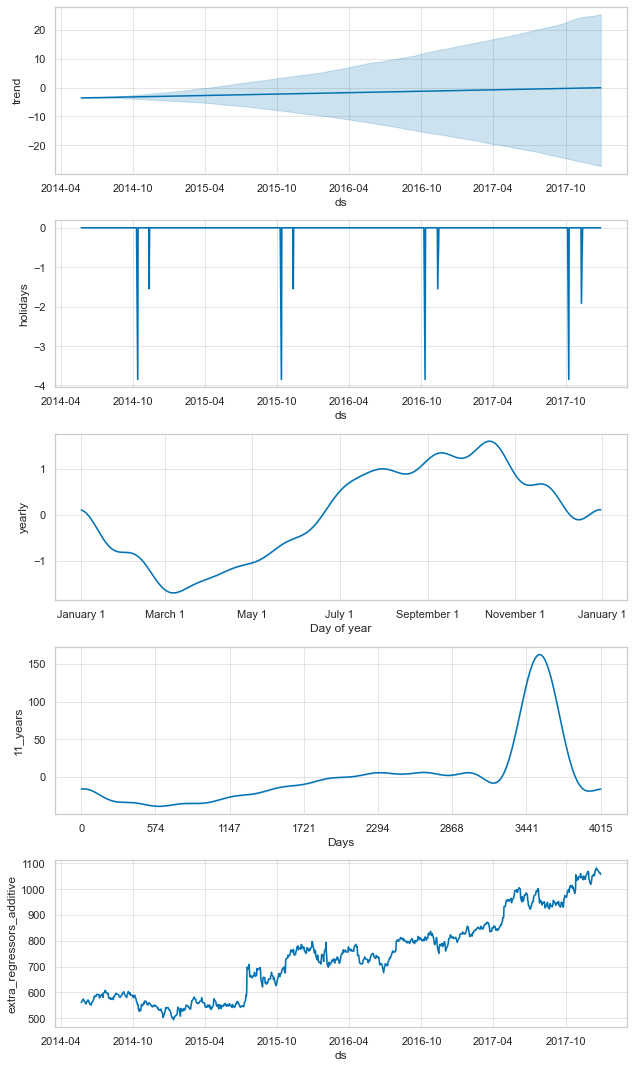

In [32]:
# Plot the components of the model
fig = model.plot_components(forecast)

In [33]:
final_df=pd.concat((forecast["yhat"],Test_df),axis=1)
final_df

,yhat,ds,Open,High,Low,y
0,559.554616,2014-05-23,558.13,565.00,554.17,563.80
1,569.375246,2014-05-27,567.78,574.87,564.15,574.87
2,572.178003,2014-05-28,574.57,577.66,569.95,570.45
3,568.301520,2014-05-29,573.39,573.48,568.45,570.56
4,566.444445,2014-05-30,571.64,572.58,565.79,571.65
...,...,...,...,...,...,...
904,1037.001000,2017-12-22,1070.00,1071.72,1067.64,1068.86
905,1028.658203,2017-12-26,1068.64,1068.86,1058.64,1065.85
906,1029.145737,2017-12-27,1066.60,1068.27,1058.38,1060.20
907,1025.028364,2017-12-28,1062.25,1064.84,1053.38,1055.95


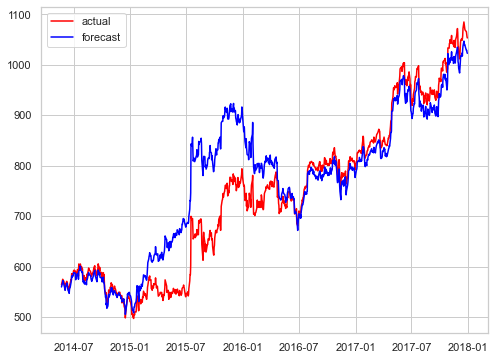

In [34]:
plt.figure(figsize=(8,6))
plt.plot(final_df["ds"],final_df["y"],color="red",label="actual")
plt.plot(final_df["ds"],final_df["yhat"],color="blue",label="forecast")
plt.legend()

### Testing with dummy data 

In [35]:
test_df2 = pd.read_excel('Dummy_data.xlsx')
test_df2

,ds,Open,High,Low,y
0,2018-01-01,557,589,523,NaN
1,2018-01-02,554,565,535,NaN
2,2018-01-03,583,596,570,NaN
3,2018-01-04,596,599,580,NaN
4,2018-01-05,523,545,520,NaN


In [36]:
forecast2=model.predict(test_df2)

forecast2=forecast2[["ds","yhat"]]
forecast2

,ds,yhat
0,2018-01-01,522.858486
1,2018-01-02,514.760262
2,2018-01-03,549.985480
3,2018-01-04,552.765386
4,2018-01-05,504.633886


#  Time series prediction using LSTM

In [37]:
LSTM_df=df.copy()

In [38]:
LSTM_df.drop(["Volume","Name"],axis=1,inplace=True)
LSTM_df

,Date,Open,High,Low,Close
0,2006-01-03,211.47,218.05,209.32,217.83
1,2006-01-04,222.17,224.70,220.09,222.84
2,2006-01-05,223.22,226.00,220.97,225.85
3,2006-01-06,228.66,235.49,226.85,233.06
4,2006-01-09,233.44,236.94,230.70,233.68
...,...,...,...,...,...
3014,2017-12-22,1070.00,1071.72,1067.64,1068.86
3015,2017-12-26,1068.64,1068.86,1058.64,1065.85
3016,2017-12-27,1066.60,1068.27,1058.38,1060.20
3017,2017-12-28,1062.25,1064.84,1053.38,1055.95


In [39]:
LSTM_df.set_index("Date", inplace = True)
LSTM_df

,Open,High,Low,Close
Date,,,,
2006-01-03,211.47,218.05,209.32,217.83
2006-01-04,222.17,224.70,220.09,222.84
2006-01-05,223.22,226.00,220.97,225.85
2006-01-06,228.66,235.49,226.85,233.06
2006-01-09,233.44,236.94,230.70,233.68
...,...,...,...,...
2017-12-22,1070.00,1071.72,1067.64,1068.86
2017-12-26,1068.64,1068.86,1058.64,1065.85
2017-12-27,1066.60,1068.27,1058.38,1060.20


### Train test split

In [40]:
training_size = round(len(LSTM_df) * 0.80)

x_train = LSTM_df[:training_size]  #train data
x_test  = LSTM_df[training_size:]  #test data
y_train=x_train.iloc[:,-1]          #train label
y_test=x_test.iloc[:,-1]            #test label

In [41]:
x_train.shape,x_test.shape ,y_train.shape,y_test.shape

((2415, 4), (604, 4), (2415,), (604,))

### Modelling a network

#### Methodology - LSTM

Normal Neural Networks are feedforward neural networks wherein the input data travels only in one direction i.e forward from the input nodes through the hidden layers and finally to the output layer. Recurrent Neural Networks, on the other hand, are a bit complicated. The data travels in cycles through different layers.

Long Short-Term Memory Network or LSTM, is a variation of a recurrent neural network (RNN) that is quite effective in predicting the long sequences of data like sentences and stock prices over a period of time.

In [42]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
X_train = Ms.fit_transform(x_train.values)
X_test = Ms.fit_transform(x_test.values)
y_train = Ms.fit_transform(y_train.values.reshape(-1, 1))
y_test = Ms.fit_transform(y_test.values.reshape(-1, 1))

In [43]:
# change the shape of data

X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [44]:
# change the shape of label data
y_train=y_train.flatten()
y_test =y_test.flatten()

In [45]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2415, 1, 4) (2415,) (604, 1, 4) (604,)


### Modelling

In [46]:
from tensorflow.python.keras.utils.version_utils import ModelVersionSelector
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

# The LSTM architecture
model = Sequential()
model.add(LSTM(132, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(100, 'relu'))
model.add(Dense(60, 'relu'))
model.add(Dense(20, 'relu'))
#output layer
model.add(Dense(1, 'linear'))

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 132)               72336     
                                                                 
 dense (Dense)               (None, 100)               13300     
                                                                 
 dense_1 (Dense)             (None, 60)                6060      
                                                                 
 dense_2 (Dense)             (None, 20)                1220      
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 92,937
Trainable params: 92,937
Non-trainable params: 0
_________________________________________________________________


In [48]:
import tensorflow as tf
# Compiling the RNN
model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics= "mae")
# Fitting to the training set
model.fit(X_train, y_train, epochs=10, batch_size=100, validation_split=0.2, shuffle=False)

Epoch 1/10
20/20 [==============================] - 4s 48ms/step - loss: 0.0667 - mae: 0.2344 - val_loss: 0.4804 - val_mae: 0.6893
Epoch 2/10
20/20 [==============================] - 0s 8ms/step - loss: 0.0542 - mae: 0.2082 - val_loss: 0.4217 - val_mae: 0.6456
Epoch 3/10
20/20 [==============================] - 0s 8ms/step - loss: 0.0428 - mae: 0.1817 - val_loss: 0.3642 - val_mae: 0.5997
Epoch 4/10
20/20 [==============================] - 0s 8ms/step - loss: 0.0324 - mae: 0.1546 - val_loss: 0.3063 - val_mae: 0.5497
Epoch 5/10
20/20 [==============================] - 0s 8ms/step - loss: 0.0230 - mae: 0.1266 - val_loss: 0.2500 - val_mae: 0.4964
Epoch 6/10
20/20 [==============================] - 0s 8ms/step - loss: 0.0153 - mae: 0.0991 - val_loss: 0.1973 - val_mae: 0.4405
Epoch 7/10
20/20 [==============================] - 0s 9ms/step - loss: 0.0097 - mae: 0.0760 - val_loss: 0.1522 - val_mae: 0.3864
Epoch 8/10
20/20 [==============================] - 0s 9ms/step - loss: 0.0064 - mae: 0.0

In [49]:
test_predicted = model.predict(X_test)
# test_predicted

19/19 [==============================] - 1s 3ms/step


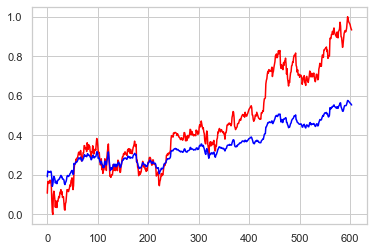

In [50]:
plt.plot(y_test,"red")
plt.plot(test_predicted ,"blue")

###  Model Evaluation

In [51]:
# Evaluating our model
from sklearn.metrics import mean_squared_error
import math

mse = mean_squared_error(y_test,test_predicted)
print(math.sqrt(mse))

0.17196295212951235
